In [1]:
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.vec_env import DummyVecEnv

from FaaSEnv import FaaSEnv

In [2]:
env = FaaSEnv()
# env = DummyVecEnv([lambda: env])

model = PPO(
    "MlpPolicy",
    env=env,
    n_steps=1024,
    batch_size=64,
    gae_lambda=0.98,
    gamma=0.999,
    n_epochs=4,
    ent_coef=0.01,
    verbose=0,
    tensorboard_log="./tensorboard/"
)

=> Loading checkpoint
=> Loading success


In [ ]:
model.learn(total_timesteps=1e6)

In [ ]:
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=1, render=False)
env.close()
print(mean_reward, std_reward)

In [ ]:
model.save("./model/ppo.pkl")

In [ ]:
del model

In [3]:
model = PPO.load("./model/ppo.pkl")

4426.355371983219 4505.483923015936


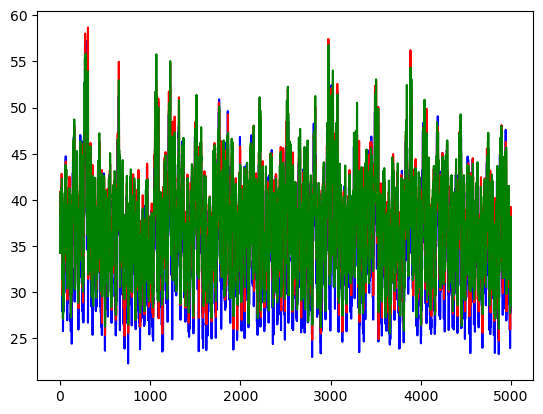

In [4]:
from utils import denormalize, cal_reward

real = []
ppo = []
lstm = []
ppo_reward = 0
lstm_reward = 0

obs = env.reset()
for _ in range(5000):
    action, _ = model.predict(observation=obs)
    ppo.append(denormalize(action))
    obs, reward, done, info = env.step(action)
    real.append(denormalize(obs[0][7]))
    lstm.append(denormalize(obs[1][7]))

    ppo_reward += reward
    lstm_reward += cal_reward(obs[0][7], obs[1][7])

print(ppo_reward, lstm_reward)

from matplotlib import pyplot as plt

plt.plot(real, 'b', label='real')
plt.plot(lstm, 'r', label='lstm')
plt.plot(ppo, 'g', label='ppo')